# Heatmaps & Correlation Matrices

## Overview

**Heatmaps** visualize 2D data using colors, perfect for correlation matrices and patterns.

### What We'll Learn

**1. Basic Heatmaps** 🔥
- Creating heatmaps with imshow()
- Creating heatmaps with pcolormesh()
- Colormaps and scales
- Annotations
- Colorbars

**2. Correlation Matrices** 📊
- Pearson correlation
- Spearman correlation
- Visualization best practices
- Masking triangles
- Annotating values

**3. Advanced Techniques** 🚀
- Clustered heatmaps
- Diverging colormaps
- Custom annotations
- Multiple heatmaps
- Interactive heatmaps

### Heatmap Methods

```python
# Method 1: imshow (uniform grid)
ax.imshow(data, cmap='viridis')

# Method 2: pcolormesh (flexible)
ax.pcolormesh(x, y, data, cmap='viridis')

# Method 3: contourf (smooth)
ax.contourf(x, y, data, levels=20, cmap='viridis')
```

### Why Use Heatmaps?

```
✓ Visualize correlation matrices
✓ Show patterns in 2D data
✓ Compare multiple variables
✓ Identify clusters
✓ Spot anomalies
✓ Compact representation
```

### Common Use Cases

- **Data Science**: Feature correlation analysis
- **Finance**: Portfolio correlation
- **Biology**: Gene expression patterns
- **Marketing**: Customer behavior matrices
- **Sports**: Performance heatmaps
- **Time Series**: Hour-day patterns

Let's master heatmaps! 🚀

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib import cm

%matplotlib inline
np.random.seed(42)
print("✅ Setup complete!")

✅ Setup complete!


## 1. Basic Heatmaps

### Using imshow()

```python
# Basic heatmap
im = ax.imshow(data, cmap='viridis')
plt.colorbar(im, ax=ax)

# Full parameters
im = ax.imshow(data,
              cmap='viridis',      # Colormap
              aspect='auto',       # Aspect ratio
              interpolation='nearest',  # Interpolation
              vmin=0, vmax=100,    # Value limits
              origin='upper')      # Origin position
```

### Adding Annotations

```python
# Annotate each cell
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        text = ax.text(j, i, f'{data[i, j]:.1f}',
                      ha='center', va='center',
                      color='white' if data[i, j] > threshold else 'black')
```

### Colormaps for Heatmaps

```python
# Sequential (0 to max)
'viridis', 'plasma', 'inferno', 'magma', 'cividis'
'Blues', 'Greens', 'Reds', 'YlOrRd'

# Diverging (negative to positive)
'RdBu', 'RdBu_r'  # Red-Blue (reverse)
'coolwarm', 'bwr'  # Blue-White-Red
'seismic', 'PiYG'  # Pink-Yellow-Green

# For correlations: use diverging centered at 0
```

## 2. Correlation Matrices

### Creating Correlation Matrix

```python
# Pandas correlation
corr = df.corr(method='pearson')  # or 'spearman', 'kendall'

# NumPy correlation
corr = np.corrcoef(data.T)
```

### Visualizing Correlation

```python
fig, ax = plt.subplots(figsize=(10, 8))

# Heatmap
im = ax.imshow(corr, cmap='RdBu_r', vmin=-1, vmax=1)

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation', fontsize=12)

# Labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels)

# Annotate
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, f'{corr[i, j]:.2f}',
                      ha='center', va='center')
```

### Masking Upper Triangle

```python
# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
corr_masked = np.ma.array(corr, mask=mask)

# Plot only lower triangle
im = ax.imshow(corr_masked, cmap='RdBu_r', vmin=-1, vmax=1)
```

### Best Practices

```
✓ Use diverging colormap for correlations
✓ Center colormap at 0
✓ Annotate correlation values
✓ Label axes clearly
✓ Consider masking redundant half
✓ Add colorbar with label
✗ Don't use sequential cmap for correlation
✗ Don't forget vmin=-1, vmax=1
✗ Don't use too small fonts
```

=== HEATMAPS ===

Example 1: Simple 2D Data Heatmap


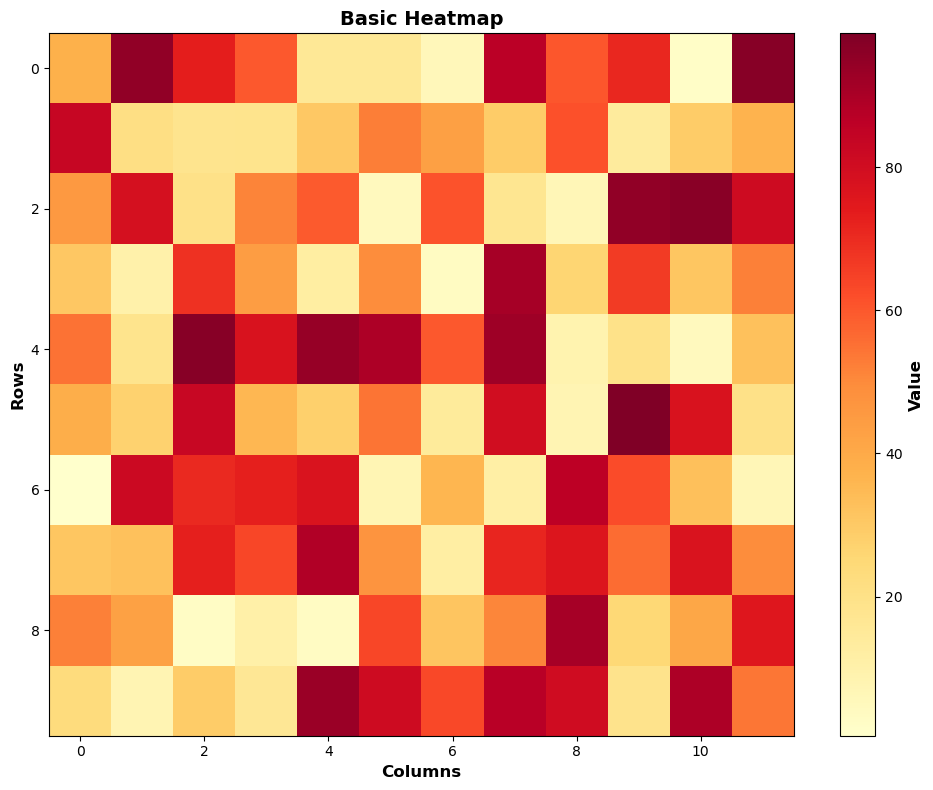


Example 2: Correlation Matrix


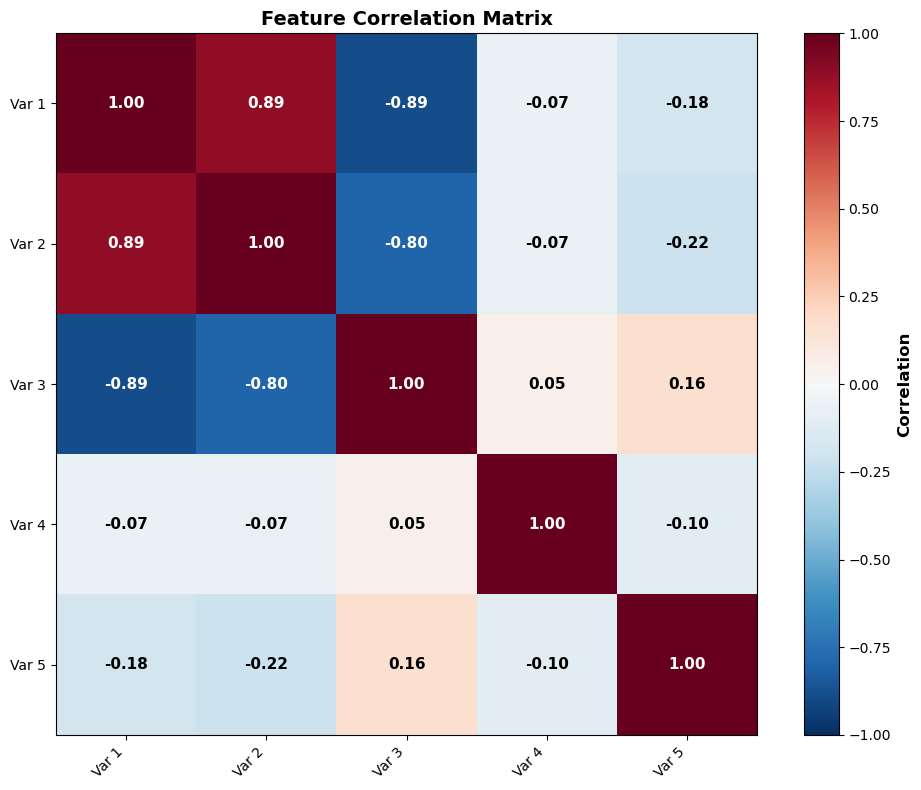


💡 Red = negative correlation, Blue = positive correlation


In [2]:
print("=== HEATMAPS ===\n")

# Example 1: Basic heatmap
print("Example 1: Simple 2D Data Heatmap")

fig, ax = plt.subplots(figsize=(10, 8))

# Generate data
data = np.random.rand(10, 12) * 100

# Create heatmap
im = ax.imshow(data, cmap='YlOrRd', aspect='auto')

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Value', fontsize=12, fontweight='bold')

# Labels
ax.set_xlabel('Columns', fontsize=12, fontweight='bold')
ax.set_ylabel('Rows', fontsize=12, fontweight='bold')
ax.set_title('Basic Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Example 2: Correlation matrix
print("\n" + "="*70)
print("Example 2: Correlation Matrix")
print("="*70)

# Generate correlated data
n = 100
data = np.random.randn(n, 5)
data[:, 1] = data[:, 0] + np.random.randn(n) * 0.5  # Correlated
data[:, 2] = -data[:, 0] + np.random.randn(n) * 0.5  # Anti-correlated

# Calculate correlation
corr = np.corrcoef(data.T)
labels = ['Var 1', 'Var 2', 'Var 3', 'Var 4', 'Var 5']

fig, ax = plt.subplots(figsize=(10, 8))

# Heatmap
im = ax.imshow(corr, cmap='RdBu_r', vmin=-1, vmax=1)

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation', fontsize=12, fontweight='bold')

# Set ticks
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)

# Annotate cells
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, f'{corr[i, j]:.2f}',
                      ha='center', va='center',
                      color='white' if abs(corr[i, j]) > 0.5 else 'black',
                      fontsize=11, fontweight='bold')

ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 Red = negative correlation, Blue = positive correlation")

## Practice & Summary

### Practice Exercises
1. Basic heatmap with random data
2. Correlation matrix with annotations
3. Masked upper triangle
4. Time-based heatmap (hour × day)
5. Diverging colormap practice
6. Custom colorbar labels
7. Clustered heatmap
8. Multi-panel heatmap comparison

### Quick Reference

```python
# Basic heatmap
im = ax.imshow(data, cmap='viridis')
plt.colorbar(im, ax=ax, label='Value')

# Correlation matrix
corr = df.corr()
im = ax.imshow(corr, cmap='RdBu_r', vmin=-1, vmax=1)

# Annotations
for i in range(rows):
    for j in range(cols):
        ax.text(j, i, f'{data[i,j]:.1f}', ha='center', va='center')
```

### Colormap Guide
- **Sequential data**: viridis, plasma, YlOrRd
- **Correlations**: RdBu_r, coolwarm (diverging)
- **Always add colorbar** with label
- **For correlations**: vmin=-1, vmax=1

### Key Concepts
- imshow() for uniform grids
- pcolormesh() for flexible grids
- Diverging colormaps for +/- data
- Annotations improve readability
- Mask redundant triangles

**Next: 10_subplots_layouts.ipynb**